# svm

In [23]:
# import dataset without foreign schools and missing data
df = pd.read_csv(r'../data/modeling/combined.csv', encoding = "ISO-8859-1")
df.columns

<IPython.core.display.Javascript object>

Index(['opeid', 'agemedian', 'cdr2014_log', 'cdr2015_log', 'cdr2016_log',
       'cohort2014_log', 'cohort2015_log', 'cohort2016_log', 'density_log',
       'educationcollegeorabove', 'familysize_log', 'female_sqrt',
       'homeownership', 'homevalue_log', 'incomehouseholdmedian_log',
       'incomehouseholdsixfigure_log', 'laborforceparticipation_sqrt',
       'male_reciprocal', 'married', 'population_log', 'proglength',
       'raceasian_log', 'raceblack_log', 'racemultiple_log',
       'racenative_reciprocal', 'raceother_log', 'racepacific', 'racewhite',
       'rentmedian_log', 'unemploymentrate_log', 'associates', 'bachelors',
       'firstprofessional', 'gradprofessional', 'mastersordoctors',
       'nondegree', 'nondegree1year', 'nondegree2years', 'nondegree3years',
       'private', 'proprietary', 'public', 'hbcuCollege', 'hispanicCollege',
       'nativeAmericanCollege', 'notReportedCollege'],
      dtype='object')

## predict school type proprietary

In [24]:
from sklearn.model_selection import train_test_split

data = df[['associates','cdr2015_log','density_log','educationcollegeorabove','private','proglength', 'public','raceasian_log','rentmedian_log']]
# data = df.drop(columns = 'proprietary')
target = df['proprietary']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .25, random_state = 109)

### training set

In [25]:
from sklearn import svm

clf = svm.SVC(kernel = 'rbf')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

In [26]:
from sklearn import metrics

print('accuracy: ', metrics.accuracy_score(y_train, y_pred))

print("precision:",metrics.precision_score(y_train, y_pred))

print("recall:",metrics.recall_score(y_train, y_pred))

print("kappa:",metrics.cohen_kappa_score(y_train, y_pred))

accuracy:  1.0
precision: 1.0
recall: 1.0
kappa: 1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

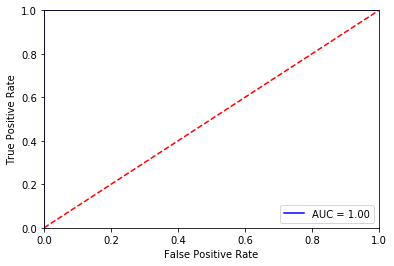

In [27]:
fpr, tpr, threshold = metrics.roc_curve(y_train, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### test set

In [28]:
from sklearn import svm

clf = svm.SVC(kernel = 'rbf')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [29]:
from sklearn import metrics

print('accuracy: ', metrics.accuracy_score(y_test, y_pred))

print("precision:",metrics.precision_score(y_test, y_pred))

print("recall:",metrics.recall_score(y_test, y_pred))

print("kappa:",metrics.cohen_kappa_score(y_test, y_pred))

accuracy:  1.0
precision: 1.0
recall: 1.0
kappa: 1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

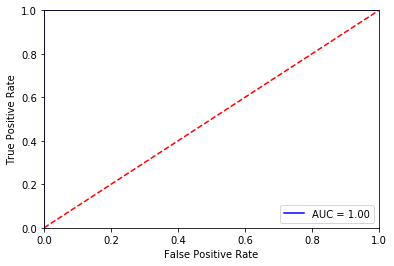

1.0


In [30]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print(roc_auc)

### cross validation

In [31]:
from sklearn.model_selection import cross_val_score, cross_val_predict

y = df.proprietary
model = clf

scores = cross_val_score(model, df, y, cv=6)
print(scores)

predictions = cross_val_predict(model, df, y, cv = 6)

# Compute the confusion matrix using crosstab function
conf_mat = pd.crosstab(y, predictions,
                       rownames=['Actual'], 
                       colnames=['Predicted'], 
                       margins = True)

# Print the confusion matrix
print('Confusion Matrix')
print(conf_mat)

print('accuracy: ', metrics.accuracy_score(y, predictions))

print("precision:",metrics.precision_score(y, predictions))

print("recall:",metrics.recall_score(y, predictions))

print("kappa:",metrics.cohen_kappa_score(y, predictions))

[0.67946578 0.67946578 0.7312187  1.         0.44147157 0.35451505]


<IPython.core.display.Javascript object>

Confusion Matrix
Predicted     0     1   All
Actual                     
0          1721   720  2441
1           545   605  1150
All        2266  1325  3591
accuracy:  0.6477304372041214
precision: 0.45660377358490567
recall: 0.5260869565217391
kappa: 0.22218493294350816


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

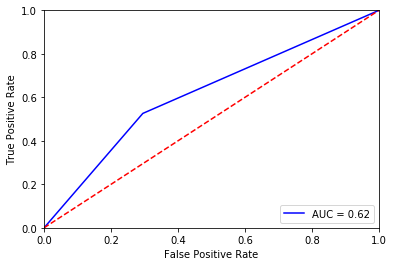

0.6155629374988867


In [32]:
fpr, tpr, threshold = metrics.roc_curve(y, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print(roc_auc)

## predict high vs low cdr

In [42]:
df['cdrHigh'] = [1 if x >= 0.536775872 else 0 for x in df.cdr2016_log]

In [43]:
from sklearn.model_selection import train_test_split

data = df[['associates','cdr2015_log','density_log','educationcollegeorabove','private','proglength', 'public','raceasian_log','rentmedian_log', 'proprietary']]
target = df['cdrHigh']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = .25, random_state = 109)

### train set

In [44]:
from sklearn import svm

clf = svm.SVC(kernel = 'rbf')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)

In [47]:
from sklearn import metrics

print('accuracy: ', metrics.accuracy_score(y_train, y_pred))

print("precision:",metrics.precision_score(y_train, y_pred))

print("recall:",metrics.recall_score(y_train, y_pred))

print("kappa:",metrics.cohen_kappa_score(y_train, y_pred))

accuracy:  0.8626067582621612
precision: 0.8513513513513513
recall: 0.8814432989690721
kappa: 0.7251097729060936


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

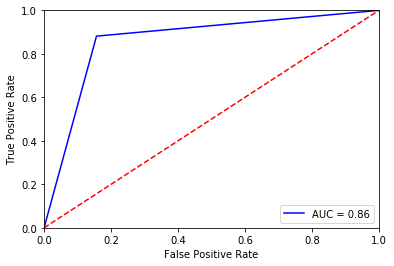

In [48]:
fpr, tpr, threshold = metrics.roc_curve(y_train, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### test set

In [49]:
from sklearn import svm

clf = svm.SVC(kernel = 'rbf')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [50]:
from sklearn import metrics

print('accuracy: ', metrics.accuracy_score(y_test, y_pred))

print("precision:",metrics.precision_score(y_test, y_pred))

print("recall:",metrics.recall_score(y_test, y_pred))

print("kappa:",metrics.cohen_kappa_score(y_test, y_pred))

accuracy:  0.8507795100222717
precision: 0.8318777292576419
recall: 0.8698630136986302
kappa: 0.7017055032226078


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

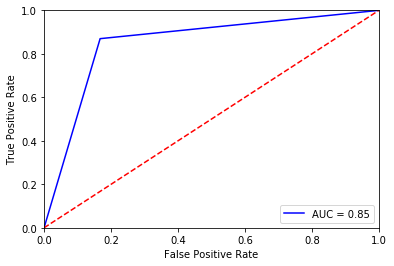

In [51]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### cross validation

In [52]:
from sklearn.model_selection import cross_val_score, cross_val_predict

y = df.cdrHigh
model = clf

scores = cross_val_score(model, df, y, cv=6)
print(scores)

predictions = cross_val_predict(model, df, y, cv = 6)

# Compute the confusion matrix using crosstab function
conf_mat = pd.crosstab(y, predictions,
                       rownames=['Actual'], 
                       colnames=['Predicted'], 
                       margins = True)

# Print the confusion matrix
print('Confusion Matrix')
print(conf_mat)

print('accuracy: ', metrics.accuracy_score(y, predictions))

print("precision:",metrics.precision_score(y, predictions))

print("recall:",metrics.recall_score(y, predictions))

print("kappa:",metrics.cohen_kappa_score(y, predictions))

[0.49916528 0.49916528 0.50083472 0.26755853 0.2458194  0.5       ]


<IPython.core.display.Javascript object>

Confusion Matrix
Predicted     0     1   All
Actual                     
0           971   824  1795
1          1263   533  1796
All        2234  1357  3591
accuracy:  0.41882483987747143
precision: 0.39277818717759766
recall: 0.2967706013363029
kappa: -0.16227127490218396


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

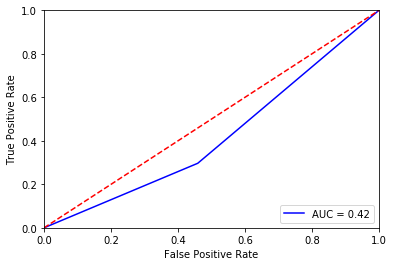

0.4188588382726082


In [53]:
fpr, tpr, threshold = metrics.roc_curve(y, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print(roc_auc)